In [1]:
import pandas as pd
import pygmt
import verde as vd
import numpy as np
import pyproj
import matplotlib.pyplot as plt
import eqs_magnetics as eqs
from itertools import product

In [2]:
df = pd.read_csv('../data/victoria_land.csv')
df

C:\Users\iuppal\AppData\Local\Temp\ipykernel_9492\1680060348.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/victoria_land.csv')


,Line,Date,Time,Lat,Lon,Easting,Northing,Upward,Height_WGS84,Project,MagGol
2040251,LG1L10.1,1991/01/01,NaN,-74.68848,162.09804,414493.389433,-8.290939e+06,2700.0,2700.0,GITARA,-62.476330
2040252,LG1L10.1,1991/01/01,NaN,-74.68859,162.09933,414531.970602,-8.290949e+06,2700.0,2700.0,GITARA,-62.500752
2040253,LG1L10.1,1991/01/01,NaN,-74.68869,162.10062,414570.496834,-8.290959e+06,2700.0,2700.0,GITARA,-62.529617
2040254,LG1L10.1,1991/01/01,NaN,-74.68879,162.10188,414608.139331,-8.290968e+06,2700.0,2700.0,GITARA,-62.566840
2040255,LG1L10.1,1991/01/01,NaN,-74.68889,162.10316,414646.370247,-8.290977e+06,2700.0,2700.0,GITARA,-62.610168
...,...,...,...,...,...,...,...,...,...,...,...
4294661,LNVT91,1993/02/01,NaN,-76.12685,161.77679,413770.034807,-8.451695e+06,2700.0,2700.0,GITARA,25.993211
4294662,LNVT91,1993/02/01,NaN,-76.12732,161.77625,413758.465517,-8.451748e+06,2700.0,2700.0,GITARA,25.811278
4294663,LNVT91,1993/02/01,NaN,-76.12778,161.77568,413746.034477,-8.451800e+06,2700.0,2700.0,GITARA,25.631227
4294664,LNVT91,1993/02/01,NaN,-76.12824,161.77513,413734.138943,-8.451852e+06,2700.0,2700.0,GITARA,25.452877


In [3]:
easting = df.Easting.to_numpy()
northing = df.Northing.to_numpy()
upwards = df.Upward.to_numpy()
coordinates = [easting, northing, upwards]

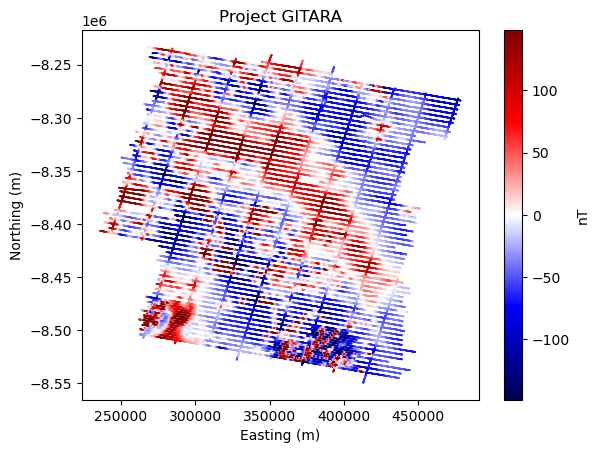

In [4]:
plt.figure()
scale = np.nanpercentile(df.MagGol, 95)
plt.scatter(*coordinates[:2], c=df.MagGol, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.colorbar(label="nT")
plt.title("Project GITARA")
plt.show()

In [5]:
field_direction = eqs.angles_to_vector(84, 122, 1)

In [6]:
# CHANGE EXTEND TO APPEND LOOK AT SYNTHETICS.PY FOR LAYOUT

In [77]:
dipole_moments = []
source_coordinates = []
# Largest source
# 1st part
source_coordinates.append(vd.profile_coordinates((260e3,-8.25e6),(310e3,-8.27e6), size=2000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(2000, 5e8)))
source_coordinates.append(vd.profile_coordinates((260e3,-8.255e6),(310e3,-8.275e6), size=2000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(2000, 5e8)))
source_coordinates.append(vd.profile_coordinates((270e3,-8.26e6),(310e3,-8.28e6), size=2000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(2000, 5e8)))
source_coordinates.append(vd.profile_coordinates((280e3,-8.27e6),(310e3,-8.285e6), size=2000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(2000, 5e8)))
source_coordinates.append(vd.profile_coordinates((280e3,-8.29e6),(325e3,-8.29e6), size=2000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(2000, 5e8)))
# 2nd part
source_coordinates.append(vd.profile_coordinates((285e3,-8.29e6),(380e3,-8.320e6), size=2000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(2000, 5e8)))
source_coordinates.append(vd.profile_coordinates((285e3,-8.295e6),(380e3,-8.325e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 5e8)))
# 3rd part
source_coordinates.append(vd.profile_coordinates((310e3,-8.31e6),(380e3,-8.33e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 5e8)))
source_coordinates.append(vd.profile_coordinates((300e3,-8.315e6),(380e3,-8.34e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 5e8)))
source_coordinates.append(vd.profile_coordinates((290e3,-8.32e6),(395e3,-8.345e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 5e8)))
source_coordinates.append(vd.profile_coordinates((290e3,-8.325e6),(400e3,-8.35e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 5e8)))
source_coordinates.append(vd.profile_coordinates((290e3,-8.33e6),(395e3,-8.355e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 5e8)))
# 4th part
source_coordinates.append(vd.profile_coordinates((345e3,-8.35e6),(395e3,-8.365e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 5e8)))
source_coordinates.append(vd.profile_coordinates((340e3,-8.36e6),(400e3,-8.375e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 5e8)))
source_coordinates.append(vd.profile_coordinates((345e3,-8.365e6),(400e3,-8.38e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 5e8)))
# 5th part
source_coordinates.append(vd.profile_coordinates((360e3,-8.37e6),(400e3,-8.385e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 2e8)))
source_coordinates.append(vd.profile_coordinates((365e3,-8.38e6),(400e3,-8.39e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 2e8)))
source_coordinates.append(vd.profile_coordinates((370e3,-8.385e6),(405e3,-8.395e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 2e8)))
source_coordinates.append(vd.profile_coordinates((375e3,-8.39e6),(405e3,-8.40e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 2e8)))
source_coordinates.append(vd.profile_coordinates((375e3,-8.395e6),(410e3,-8.405e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 2e8)))
# 6th part
source_coordinates.append(vd.profile_coordinates((370e3,-8.40e6),(410e3,-8.41e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 2e8)))
source_coordinates.append(vd.profile_coordinates((370e3,-8.405e6),(415e3,-8.415e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 2e8)))
source_coordinates.append(vd.profile_coordinates((370e3,-8.41e6),(415e3,-8.42e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 2e8)))
source_coordinates.append(vd.profile_coordinates((370e3,-8.415e6),(420e3,-8.425e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 2e8)))
# 7th part
source_coordinates.append(vd.profile_coordinates((390e3,-8.42e6),(420e3,-8.43e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 2e8)))
source_coordinates.append(vd.profile_coordinates((395e3,-8.425e6),(425e3,-8.435e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 2e8)))
source_coordinates.append(vd.profile_coordinates((395e3,-8.43e6),(425e3,-8.44e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 2e8)))
source_coordinates.append(vd.profile_coordinates((395e3,-8.435e6),(430e3,-8.445e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 1e8)))
# 8th part
source_coordinates.append(vd.profile_coordinates((400e3,-8.44e6),(440e3,-8.45e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 9e7)))
source_coordinates.append(vd.profile_coordinates((405e3,-8.445e6),(435e3,-8.455e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 9e7)))
source_coordinates.append(vd.profile_coordinates((415e3,-8.45e6),(430e3,-8.46e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 9e7)))
source_coordinates.append(vd.profile_coordinates((418e3,-8.455e6),(425e3,-8.465e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 9e7)))
source_coordinates.append(vd.profile_coordinates((419e3,-8.46e6),(422e3,-8.47e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 9e7)))
source_coordinates.append(vd.profile_coordinates((420e3,-8.46e6),(422e3,-8.47e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 9e7)))
source_coordinates.append(vd.profile_coordinates((420e3,-8.465e6),(420e3,-8.475e6), size=4000, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(4000, 9e7)))

# North Anomalies
source_coordinates.append([np.asarray(c).ravel() for c in vd.grid_coordinates([340e3,390e3,-8.26e6,-8.20e6,], shape=(100,100), extra_coords=-200)])
dipole_moments.append(eqs.angles_to_vector(68, 80, np.full(10000, 5e8)))
source_coordinates.append(vd.scatter_points([250e3, 430e3, -8.28e6, -8.20e6,], size=1000, random_state=0, extra_coords=-1e3))
dipole_moments.append(eqs.angles_to_vector(45, 80, np.full(1000, 1e10)))
source_coordinates.append([np.asarray(c).ravel() for c in vd.grid_coordinates([420e3,430e3,-8.315e6,-8.30e6,], shape=(50,50), extra_coords=-200)])
dipole_moments.append(eqs.angles_to_vector(68, 80, np.full(2500, 9e8)))

# West scatter anomalies
source_coordinates.append(vd.scatter_points([250e3, 290e3, -8.34e6, -8.30e6,], size=200, random_state=10,extra_coords=-100))
dipole_moments.append(eqs.angles_to_vector(60, 75, np.full(200, 5e9)))

# Grid anomaly 1
source_coordinates.append([np.asarray(c).ravel() for c in vd.grid_coordinates([248e3,270e3,-8.38e6,-8.36e6,], shape=(50,50), extra_coords=-200)])
dipole_moments.append(eqs.angles_to_vector(68, 80, np.full(2500, 5e9)))
# Grid anomaly 2
source_coordinates.append([np.asarray(c).ravel() for c in vd.grid_coordinates([290e3,310e3,-8.38e6,-8.36e6,], shape=(50,50), extra_coords=-200)])
dipole_moments.append(eqs.angles_to_vector(68, 80, np.full(2500, 5e9)))
# Grid anomaly 3
source_coordinates.append([np.asarray(c).ravel() for c in vd.grid_coordinates([330e3,350e3,-8.40e6,-8.38e6,], shape=(50,50), extra_coords=-200)])
dipole_moments.append(eqs.angles_to_vector(68, 80, np.full(2500, 5e9)))

# Middle scatter anomaly
source_coordinates.append(vd.scatter_points([240e3, 260e3, -8.42e6, -8.38e6,], size=250, random_state=1,extra_coords=-100))
dipole_moments.append(eqs.angles_to_vector(40, 45, np.full(250, 3e9)))
source_coordinates.append(vd.scatter_points([310e3, 400e3, -8.46e6, -8.41e6,], size=1000, random_state=2,extra_coords=-100))
dipole_moments.append(eqs.angles_to_vector(40, 45, np.full(1000, 3e9)))

# South-West anomalies
source_coordinates.append([np.asarray(c).ravel() for c in vd.grid_coordinates([270e3,300e3,-8.47e6,-8.45e6,], shape=(50,50), extra_coords=-200)])
dipole_moments.append(eqs.angles_to_vector(68, 80, np.full(2500, 2e9)))
source_coordinates.append(vd.profile_coordinates((260e3,-8.54e6),(300e3,-8.48e6), size=1000, extra_coords=-6e3)[0])
dipole_moments.append(eqs.angles_to_vector(85, 75, np.full(1000, 5e9)))
source_coordinates.append(vd.scatter_points([250e3, 275e3, -8.50e6, -8.485e6,], size=750, random_state=1,extra_coords=-1e3))
dipole_moments.append(eqs.angles_to_vector(35, 70, np.full(750, 1e9)))

# South-East Anomalies
source_coordinates.append(vd.profile_coordinates((370e3,-8.53e6),(400e3,-8.49e6), size=1000, extra_coords=-300)[0])
dipole_moments.append(eqs.angles_to_vector(45, 10, np.full(1000, 8e8)))
source_coordinates.append(vd.profile_coordinates((370e3,-8.53e6),(385e3,-8.49e6), size=1000, extra_coords=-300)[0])
dipole_moments.append(eqs.angles_to_vector(45, 10, np.full(1000, 8e8)))
source_coordinates.append(vd.scatter_points([355e3, 410e3, -8.55e6, -8.50e6,], size=500, random_state=1,extra_coords=-1e3))
dipole_moments.append(eqs.angles_to_vector(45, 75, np.full(500, 5e9)))

# Regional
source_coordinates.append([np.asarray(c).ravel() for c in vd.grid_coordinates([200e3,500e3,-8.6e6,-8.2e6,], shape=(70,70), extra_coords=-30e3)])
dipole_moments.append(eqs.angles_to_vector(-88, 80, np.full(4900, 1e11)))

source_coordinates = np.concatenate(source_coordinates, axis=1)
dipole_moments = np.concatenate(dipole_moments, axis=1)

In [78]:
print([c.shape for c in coordinates])
print([c.shape for c in source_coordinates])
print([c.shape for c in dipole_moments])

[(271653,), (271653,), (271653,)]
[(162100,), (162100,), (162100,)]
[(162100,), (162100,), (162100,)]


In [79]:
magnetic_field = eqs.dipole_magnetic(coordinates, source_coordinates, dipole_moments)

In [80]:
total_field_anomaly = eqs.total_field_anomaly(magnetic_field, field_direction)
bnorm = eqs.magnetic_field_norm(magnetic_field)

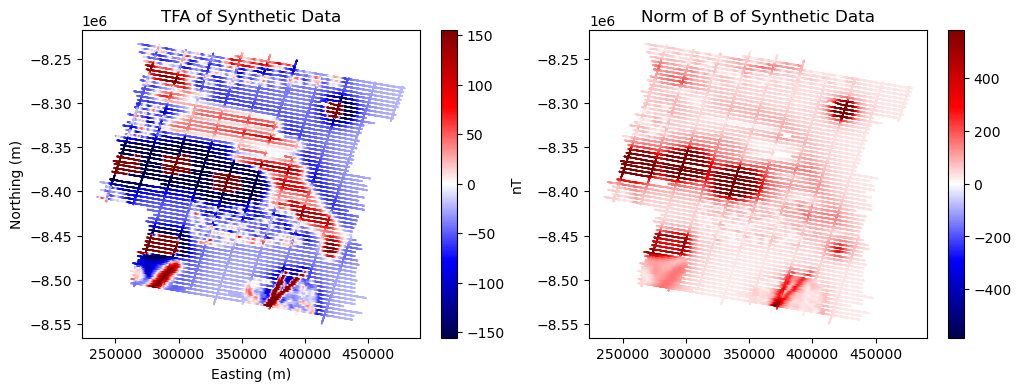

In [81]:
plt.figure(figsize=(12,4))
scale = np.nanpercentile(total_field_anomaly, 95)
plt.subplot(1,2,1)
plt.scatter(*coordinates[:2], c=total_field_anomaly, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.title("TFA of Synthetic Data")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.colorbar(label="nT")
scale_bnorm = np.nanpercentile(bnorm, 95)
plt.subplot(1,2,2)
plt.scatter(*coordinates[:2], c=bnorm, cmap="seismic",s=0.01, vmin=-scale_bnorm, vmax=scale_bnorm)
plt.title("Norm of B of Synthetic Data")
plt.colorbar()
plt.show()

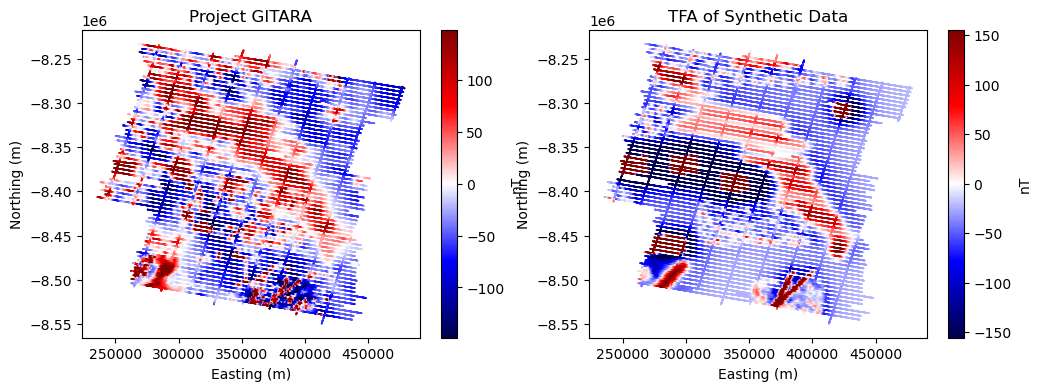

In [82]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
scale = np.nanpercentile(df.MagGol, 95)
plt.scatter(*coordinates[:2], c=df.MagGol, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.colorbar(label="nT")
plt.title("Project GITARA")

plt.subplot(1,2,2)
scale = np.nanpercentile(total_field_anomaly, 95)
plt.scatter(*coordinates[:2], c=total_field_anomaly, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.title("TFA of Synthetic Data")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.colorbar(label="nT")
scale_bnorm = np.nanpercentile(bnorm, 95)

plt.show()

## EQS Deep¶